DAY 13 — Scikit-learn & my First ML Model

WHAT IS MACHINE LEARNING — REALLY?

Machine Learning is teaching a computer to find patterns in data so it can make predictions on new data it has never seen before.

TOPIC 1 — The ML Workflow

Every single ML project follows this same sequence:

1. Get Data
2. Clean & Prepare Data
3. Split into Training and Testing sets
4. Choose a Model
5. Train the Model on Training data
6. Evaluate on Testing data
7. Make Predictions

Step 3 is critical, you never train and test on the same data. That's like giving a student the exam answers during study and then testing them on those same answers. The score means nothing. You split your data — train on 80%, test on the remaining 20% the model has never seen.

TOPIC 2 — Features and Target

Two terms you'll use every day:
* Features (X) — the input columns. The information you give the model to learn from. In Titanic — Age, Sex, Pclass, Fare.
* Target (y) — the output column. What you want to predict. In Titanic — Survived (0 or 1).

* X = df[["Pclass", "Age", "Fare"]]   # features input
* y = df["Survived"]                   # target what to predict

The model learns the relationship between X and y during training. Then when you give it new X values it predicts y.

 TOPIC 3 — Train Test Split

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("Titanic.csv")

X = df[["Pclass", "Age", "Fare"]]   # features — input
y = df["Survived"]                   # target — what to predict

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42     # fixes the random split so results are reproducible
)

# random_state=42` is just a seed for the random number generator. 
# Using 42 means every time you run this code you get the same split. 
# Without it the split would be different every run and your results would change. 
# Any number works — 42 is just a convention in the ML community.

print(X_train.shape)   # (712, 3) — 712 rows for training
print(X_test.shape)    # (179, 3) — 179 rows for testing


(712, 3)
(179, 3)


In [ ]:
""" 
TOPIC 4: Your First Model — Decision Tree

A Decision Tree is the most intuitive ML model.
It learns by asking yes/no questions about your features 
exactly like a flowchart:


Is Pclass == 1?
├── Yes → Did they pay Fare > 50?
│         ├── Yes → SURVIVED
│         └── No  → DIED
└── No  → Is Sex == female?
          ├── Yes → SURVIVED
          └── No  → DIED

The model builds this tree automatically from your training data. 
During prediction it walks a new passenger through the tree and reaches a conclusion.

"""

In [3]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)         # training — model learns the tree
predictions = model.predict(X_test) # predicting on unseen data

Three lines. That's the entire ML model. fit() trains, predict() predicts.

TOPIC 5 — Evaluating Your Model

After predicting you need to know how good your model is

In [4]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy — what percentage did it get right
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Detailed report — precision, recall, f1-score per class
print(classification_report(y_test, predictions))

Accuracy: 69.27%
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       105
           1       0.66      0.53      0.59        74

    accuracy                           0.69       179
   macro avg       0.68      0.67      0.67       179
weighted avg       0.69      0.69      0.69       179



* Accuracy — out of all predictions, what fraction were correct. 80% means it got 8 out of 10 right.
* Precision — out of everyone the model predicted as survived, how many actually survived.
* Recall — out of everyone who actually survived, how many did the model correctly identify.
* F1-score — balance between precision and recall. This is the number you care about most when classes are imbalanced — like Titanic where more people died than survived.

TOPIC 6 — Encoding Categorical Variables

ML models only understand numbers. Your Sex column has "male" and "female" — strings. You need to convert them to numbers before feeding into the model.

In [ ]:
# Simple approach — map manually
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Pandas approach — get_dummies (one-hot encoding)
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

map() replaces each value with its numeric equivalent. get_dummies() creates new binary columns for each category — this is called one-hot encoding and it's the standard way to handle categorical columns with more than 2 values.

TOPIC 7 — Feature Importance

After training, you can ask the Decision Tree — "which feature did you find most useful?"


In [13]:
importance_df = pd.DataFrame({
    "Feature": ["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch"],
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

print(importance_df)

  Feature  Importance
2     Sex    0.308977
3    Fare    0.271238
1     Age    0.222803
0  Pclass    0.119203
4   SibSp    0.050848
5   Parch    0.026929


This tells you which clues mattered most for predictions. Sex and Fare usually come out on top for Titanic which matches exactly what you found during EDA on Day 8. That's not a coincidence EDA and feature importance should tell the same story.

Task 1 — Prepare the Titanic Data (20 mins)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("Titanic.csv")
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
X = df[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(712, 6)
(179, 6)
(712, 1)
(179, 1)


Task 2 — Build and Evaluate Your First Model (25 mins)

In [18]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, predictions))

# accuracy is 75.42% means almost 7.5 questions are predicted correctly out of 10..
# f1 score is .79 means that the overall quality of both precision and recall is good..

Accuracy: 75.42%
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       105
           1       0.71      0.68      0.69        74

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



Task 3 — Make Real Predictions (20 mins)

In [15]:
import pandas as pd

new_passengers = pd.DataFrame({
    "Pclass": [1, 3, 2],
    "Age": [25, 35, 8],
    "Sex": [1, 0, 1],       # 1=female, 0=male
    "Fare": [100, 10, 30],
    "SibSp": [0, 1, 0],
    "Parch": [0, 2, 1]
})

result = model.predict(new_passengers)
for i, pred in enumerate(result):
    status = "SURVIVED" if pred == 1 else "DIED"
    print(f"Passenger {i+1}: {status}")

Passenger 1: DIED
Passenger 2: DIED
Passenger 3: SURVIVED


Task 4 — Feature Importance Chart

C:\Users\katiy\AppData\Local\Temp\ipykernel_24908\635043337.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


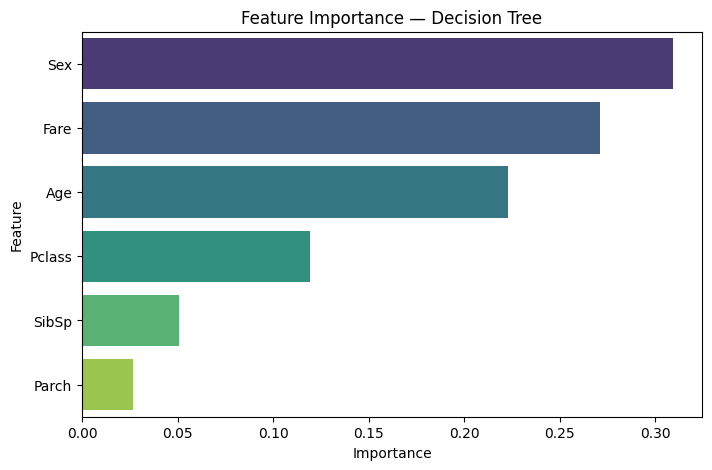

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

importance_df = pd.DataFrame({
    "Feature": ["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch"],
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance — Decision Tree")
plt.show()